In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Medication Usage Patterns Across Hospital Services


## Data Sources:
- `PRESCRIPTIONS.csv`
- `SERVICES.csv`

## Visualization:
- A heatmap of common medications prescribed across different hospital services.

## Why It’s Interesting:
- Reveals which medications are predominant in specific departments.
- Helps in understanding departmental medication preferences and potential areas for standardization or review.

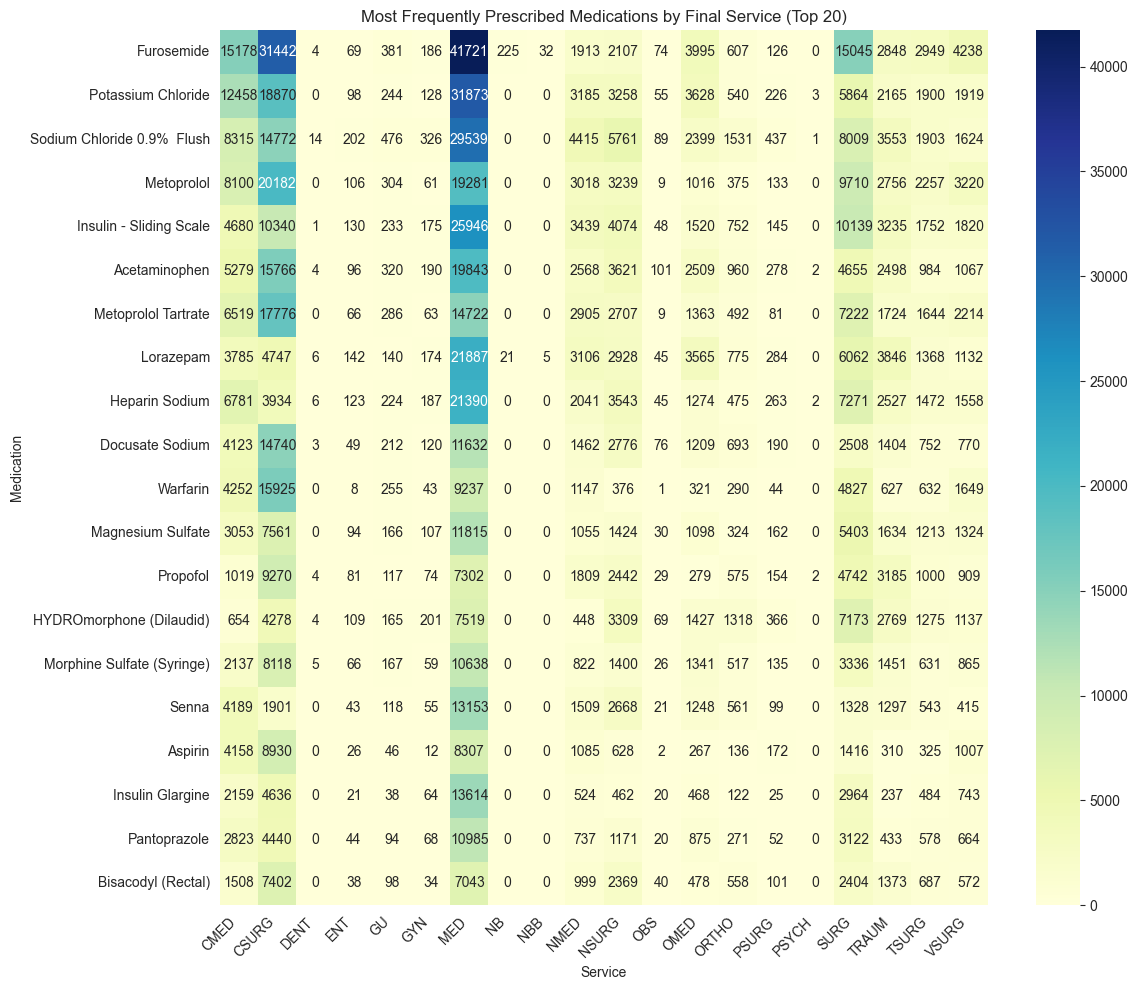

In [4]:
# Import data
prescriptions = pd.read_csv('data/PRESCRIPTIONS.csv', low_memory=False)
services = pd.read_csv('data/SERVICES.csv')

# Data preprocessing & sorting
services['TRANSFERTIME'] = pd.to_datetime(services['TRANSFERTIME'])
services_sorted = services.sort_values(by=['HADM_ID','TRANSFERTIME'], ascending=[True,False])
services_final = services_sorted.drop_duplicates(subset=['HADM_ID'], keep='first')
services_final = services_final.rename(columns={'CURR_SERVICE': 'SERVICE'})

# Merge prescriptions with services
merged_df = pd.merge(
    prescriptions,
    services_final[['HADM_ID','SERVICE']],
    on='HADM_ID',
    how='left'
)

# Aggregate drug counts by service
drug_col = 'DRUG_NAME_GENERIC'
service_drug_counts = (
    merged_df
    .groupby(['SERVICE', drug_col])
    .size()
    .reset_index(name='count')
)

# Preparing data for heatmap visualization
heatmap_data = service_drug_counts.pivot(
    index=drug_col,
    columns='SERVICE',
    values='count'
)

heatmap_data.fillna(0, inplace=True)

heatmap_data['Total'] = heatmap_data.sum(axis=1)
top_n = 20
heatmap_data_top = (
    heatmap_data
    .sort_values('Total', ascending=False)
    .head(top_n)
    .drop(columns='Total')
)

# Data normalization, optional
# heatmap_data_top = heatmap_data_top.div(heatmap_data_top.sum(axis=0), axis=1)
# heatmap_data_top = heatmap_data_top.round(3)

# Heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_data_top,
    annot=True,
    fmt='g',
    cmap='YlGnBu',
)
plt.title('Most Frequently Prescribed Medications by Final Service (Top 20)')
plt.xlabel('Service')
plt.ylabel('Medication')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()